# Générer le graphe

## D'abord generer la matrice d'adjacence

In [31]:
import numpy as np
import random

def generer_matrice_adjacence(taille,typeDeGraphe):
    matrice = np.empty((taille, taille))              
    
    if(typeDeGraphe == 'Complete'):               
        for i in range(taille):
            for j in range(i,taille):
                valeur = 1 if i!=j else 0 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    else:
         for i in range(taille):
            for j in range(i,taille):
                valeur = random.randint(0, 1)  if i!=j else 0
                matrice[i][j] = valeur
                matrice[i][j] = valeur
    return matrice

matriceAdjacence = generer_matrice_adjacence(8, "Not-Complete")
print(matriceAdjacence)

print("\n \n")     

matriceAdjacence = generer_matrice_adjacence(8, "Complete")
print(matriceAdjacence)

[[0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]

 

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]


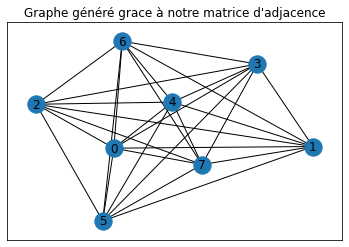

In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph(matriceAdjacence, nodetype=int)
plt.title("Graphe généré grace à notre matrice d'adjacence")
nx.draw_networkx(G)

## Génerer la liste des voisins de chaque sommet en se basant sur la matrice d'adjacence

.

In [32]:
def lister_voisins(matriceAdjacence):
   
    taille = len(matriceAdjacence.T)
    voisins = []
    i=0
    while (i <= taille-1):
        for j in range(taille):
            if(matriceAdjacence[i][j] != 0 and matriceAdjacence[j][i]!=0 ):
                voisins.append(j)
        print("Les voisins du sommet", i, "sont :",voisins)
        voisins.clear()
        i+=1
        
lister_voisins(matriceAdjacence)

Les voisins du sommet 0 sont : [1, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 1 sont : [0, 2, 3, 4, 5, 6, 7]
Les voisins du sommet 2 sont : [0, 1, 3, 4, 5, 6, 7]
Les voisins du sommet 3 sont : [0, 1, 2, 4, 5, 6, 7]
Les voisins du sommet 4 sont : [0, 1, 2, 3, 5, 6, 7]
Les voisins du sommet 5 sont : [0, 1, 2, 3, 4, 6, 7]
Les voisins du sommet 6 sont : [0, 1, 2, 3, 4, 5, 7]
Les voisins du sommet 7 sont : [0, 1, 2, 3, 4, 5, 6]


## Génerer la matrice symétrique pondérée

In [33]:
def generer_matrice_pondere(matrice):
    for i in range(len(matrice.T)):
        for j in range(i,len(matrice.T)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, 999)
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice

matricePondere = generer_matrice_pondere(matriceAdjacence)
print(matricePondere)

[[  0. 971. 576. 925. 102. 993. 175.  31.]
 [971.   0.  13. 354.  42. 252. 466.  71.]
 [576.  13.   0. 681.  56. 800. 582. 178.]
 [925. 354. 681.   0. 538. 197.  24. 821.]
 [102.  42.  56. 538.   0.  79. 755. 540.]
 [993. 252. 800. 197.  79.   0. 133.  83.]
 [175. 466. 582.  24. 755. 133.   0. 210.]
 [ 31.  71. 178. 821. 540.  83. 210.   0.]]


## Génerer les fenetres de temps pour chaque sommet 

In [15]:
import random
def genererFenetreTemps(nbrSommet):
    ListeFenetreTemps = []
    temps = ()  
    # Interval de temps sur 24h
    intervale = [(6,8),(8,10),(10,12),(12,14),(14,16),(16,18),(18,20),(20,22),(22,00),(00,2),(2,4),(4,6)]

    for i in range(nbrSommet):
        temps= random.choice(intervale)
        ListeFenetreTemps.append(temps)
    return ListeFenetreTemps

data= genererFenetreTemps(10)  
# Resultat sur un graphe de 10 sommets 
print(data)



[(16, 18), (10, 12), (8, 10), (14, 16), (2, 4), (22, 0), (8, 10), (8, 10), (6, 8), (2, 4)]


# Recherche Tabou

<img src="./public/Source/Image/Tabou.png">


### Etape 0 : Génerer la solution initiale 
Cas 1 : géneration d'une solution intiale aléatoire

In [20]:
def genererSolutionInitiale(nbrSommet):
    return random.sample(range(1, nbrSommet+1), nbrSommet)
solutionInitial = genererSolutionInitiale(8)
print("La solution initiale = ", solutionInitial)

La solution initiale =  [6, 1, 4, 7, 8, 2, 3, 5]


Cas 2 : géneration d'une solution intiale à l'aide de l'algorithme Clarke-Wright

<img src="./public/Source/Image/MatriceClarke.png">

In [39]:
def genererClarkMatrice(matricePondere):
    clarkMatrice = matricePondere.copy()
    for i in range (len(matricePondere.T)):
        if i == 0:
            for j in range(len(matricePondere.T)):
                clarkMatrice[i][j] = 0
    return clarkMatrice

clarkMatrice = genererClarkMatrice(matricePondere)
print(clarkMatrice)

[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [757.   0. 995. 124.  58. 154. 555. 353.]
 [767. 995.   0. 310. 821. 144. 668. 931.]
 [ 52. 124. 310.   0. 656. 674. 418. 106.]
 [770.  58. 821. 656.   0. 377. 372. 457.]
 [537. 154. 144. 674. 377.   0.  84. 644.]
 [391. 555. 668. 418. 372.  84.   0. 731.]
 [ 59. 353. 931. 106. 457. 644. 731.   0.]]


<img src="./public/Source/Image/SavingList.png">

In [42]:
import pprint

def genererSaving(clarkMatrice):
    listSaving =  {}
    for i in range(1,len(clarkMatrice.T)):
        for j in range(1,len(clarkMatrice.T)):
            listSaving[(i,j)] = clarkMatrice[1,i] + clarkMatrice[1,j] - clarkMatrice[j,i] 
    return listSaving

data = genererSaving(clarkMatrice)

pp = pprint.PrettyPrinter(depth=3)
pp.pprint(data)

{(1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.0,
 (2, 1): 0.0,
 (2, 2): 1990.0,
 (2, 3): 809.0,
 (2, 4): 232.0,
 (2, 5): 1005.0,
 (2, 6): 882.0,
 (2, 7): 417.0,
 (3, 1): 0.0,
 (3, 2): 809.0,
 (3, 3): 248.0,
 (3, 4): -474.0,
 (3, 5): -396.0,
 (3, 6): 261.0,
 (3, 7): 371.0,
 (4, 1): 0.0,
 (4, 2): 232.0,
 (4, 3): -474.0,
 (4, 4): 116.0,
 (4, 5): -165.0,
 (4, 6): 241.0,
 (4, 7): -46.0,
 (5, 1): 0.0,
 (5, 2): 1005.0,
 (5, 3): -396.0,
 (5, 4): -165.0,
 (5, 5): 308.0,
 (5, 6): 625.0,
 (5, 7): -137.0,
 (6, 1): 0.0,
 (6, 2): 882.0,
 (6, 3): 261.0,
 (6, 4): 241.0,
 (6, 5): 625.0,
 (6, 6): 1110.0,
 (6, 7): 177.0,
 (7, 1): 0.0,
 (7, 2): 417.0,
 (7, 3): 371.0,
 (7, 4): -46.0,
 (7, 5): -137.0,
 (7, 6): 177.0,
 (7, 7): 706.0}


# Etape 1 : Génrer la liste de voisins de la solution initiale

In [21]:
def genererVoisinage(solution):
    listeVoisins = []
    voisinage = solution
    for i in range(len(solution)):
        for j in range(i+1,len(solution)-1):
            voisinage = solution.copy()
            voisinage[i], voisinage[j] = voisinage[j],  voisinage[i]
            listeVoisins.append(voisinage)
    return listeVoisins
       
listeVoisins  = genererVoisinage(solutionInitial)
print(listeVoisins)

[[1, 6, 4, 7, 8, 2, 3, 5], [4, 1, 6, 7, 8, 2, 3, 5], [7, 1, 4, 6, 8, 2, 3, 5], [8, 1, 4, 7, 6, 2, 3, 5], [2, 1, 4, 7, 8, 6, 3, 5], [3, 1, 4, 7, 8, 2, 6, 5], [6, 4, 1, 7, 8, 2, 3, 5], [6, 7, 4, 1, 8, 2, 3, 5], [6, 8, 4, 7, 1, 2, 3, 5], [6, 2, 4, 7, 8, 1, 3, 5], [6, 3, 4, 7, 8, 2, 1, 5], [6, 1, 7, 4, 8, 2, 3, 5], [6, 1, 8, 7, 4, 2, 3, 5], [6, 1, 2, 7, 8, 4, 3, 5], [6, 1, 3, 7, 8, 2, 4, 5], [6, 1, 4, 8, 7, 2, 3, 5], [6, 1, 4, 2, 8, 7, 3, 5], [6, 1, 4, 3, 8, 2, 7, 5], [6, 1, 4, 7, 2, 8, 3, 5], [6, 1, 4, 7, 3, 2, 8, 5], [6, 1, 4, 7, 8, 3, 2, 5]]


## Etape 2 : Trouver la meilleur solution de la liste de vosisinage 

In [19]:
def meilleurVoisin(listeVoisins, matricePondere):
    meilleurVoisin = []
    meilleurCout = 0
    for voisin in range(len(listeVoisins)):
        cout = 0
        for elm in range(len(listeVoisins[voisin])-1):
            i = listeVoisins[voisin][elm]
            j = listeVoisins[voisin][elm+1]
            cout = cout + matricePondere[i-1][j-1]
            if(len(meilleurVoisin) == 0):
                meilleurVoisin = listeVoisins[voisin]
                meilleurCout = cout
        if(cout < meilleurCout):
            meilleurVoisin = listeVoisins[voisin]
            meilleurCout = cout

    return meilleurVoisin, meilleurCout   # Cette fonction retourne le meilleur voisin ainsi que son cout 
        
bestVoisin = meilleurVoisin(listeVoisins, matricePondere)

print(bestVoisin) 


([3, 5, 7, 4, 8, 6, 2, 1], 527.0)


## Etape 03 : Est-ce que la meilleurSolutionVoisine est meilleur que la meilleurSolution ?

In [29]:
def estMeilleurQue(solution_1,solution_2):

    if(len(solution_1) != len(solution_2)):
        print("Les deux solutions doivent etre de meme taille.")
        return 0

    cout_1 = 0
    cout_2 = 0
    for i in range(len(solution_1)):
        cout_1 += solution_1[i]
        cout_2 += solution_2[i]

    return cout_1 == cout_2

# estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[5, 7, 8, 6, 2, 1])         # Cas 1: pas la meme taille
# estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[3, 5, 7, 4, 8, 6, 2, 1])   # Cas 2: egale
estMeilleurQue([3, 5, 7, 4, 8, 6, 2, 1],[5, 3, 0, 7, 8, 2, 6, 1])     # Cas 3: different

False

## Implemantation de la Recherche Tabou

In [53]:
##################### Premiere version (Work In Progress )  ##############################

def RechercheTabou(nbrSommet,matricePondere,iterationMax):
    solutionCourante = genererSolutionInitiale(nbrSommet)
    listeVoisins = list()
    meilleurSolution = list()
    listeTabou = list()
    iteration = 1
    meilleurCout = 0

    while(iteration < iterationMax):
        listeVoisins = genererVoisinage(solutionCourante)
        meilleurSolutionVoisine, meilleurCout = meilleurVoisin(listeVoisins,matricePondere)

        if(estMeilleurQue(meilleurSolutionVoisine,solutionCourante)):
            solutionCourante = meilleurSolutionVoisine
            meilleurSolution = meilleurSolutionVoisine
            listeTabou.clear()
            listeTabou.append(meilleurSolution)
        elif(meilleurSolutionVoisine in listeTabou):
            listeVoisins.remove(meilleurSolutionVoisine)

        else :
            solutionCourante = meilleurSolutionVoisine
            meilleurSolution = meilleurSolutionVoisine
            listeTabou.clear()
            listeTabou.append(meilleurSolution)
        iteration+= 1

    return meilleurSolutionVoisine , meilleurCout
    
meilleurChemin, meilleurCout = RechercheTabou(8,matricePondere,100)

print(meilleurChemin,meilleurCout)

##################### Premiere version (Work In Progress )  ##############################

[3, 6, 8, 2, 1, 7, 4, 5] 453.0
